# Introduction to Data Science – Homework 7
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: Friday, March 21, 2025 11:59pm.

In this homework, you will use classification methods to classify handwritten digits (Part 1) and predict the satisfaction level of airline passengers (Part 2). We hope these exercises will give you an idea of the broad usage of classification methods. 

## Your Data
First Name:
<br>
Last Name:
<br>
E-mail:
<br>
UID:
<br>

In [1]:
# imports and setup 

import pandas as pd
import numpy as np

from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## Part 1: MNIST handwritten digits

The MNIST handwritten digit dataset is a famous test dataset containing images of handwritten digits, together with labels indicating which digit is in each image. You will see that images are just matrices with scalar values, and that we can apply the classification algorithms we studied on them.

Because both the features and the labels are present in this dataset (and labels for large datasets are generally difficult/expensive to obtain), this dataset is frequently used as a benchmark to compare various classification methods. For example, [this webpage](http://dia.fi.upm.es/~lbaumela/PracRF11/MNIST.html) gives a comparison of a variety of different classification methods on MNIST (Note that the tests on this website are for higher resolution images than we'll use.) 

In this problem, we'll use scikit-learn to compare classification methods on the MNIST dataset. 

There are several versions of the MNIST dataset. We'll use the one that is built-into scikit-learn, described [here](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). 

1) Classes: 10 (one for each digit)
2) Samples total: 1797
3) Samples per class: $\approx$180
4) Dimensionality: 64 (8 pixels by 8 pixels)
5) Features: integers 0-16 (grayscale value; 0 is white, 16 is black)

Here are some examples of the images. Note that the digits have been size-normalized and centered in a fixed-size ($8\times8$ pixels) image.

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_digits_classification_001.png" width="500">

Note that we will scale the data before running them through our algorithms. You can read details about scaling and why it's important [here](http://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling).

In [2]:
digits = load_digits()
#X = digits.data
X = scale(digits.data)
y = digits.target
print(type(X))

n_samples, n_features = X.shape
n_digits = len(np.unique(digits.target))
print("n_digits: %d, n_samples %d, n_features %d" % (n_digits, n_samples, n_features))


<class 'numpy.ndarray'>
n_digits: 10, n_samples 1797, n_features 64


In [3]:
# this is what one digit (a zero) looks like

print("===\nThe digit")
print(digits.target[0])

print("===\nThe raw data")
print(digits.images[0])

print("===\nThe scaled data")
print(X[0])

===
The digit
0
===
The raw data
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
===
The scaled data
[ 0.         -0.33501649 -0.04308102  0.27407152 -0.66447751 -0.84412939
 -0.40972392 -0.12502292 -0.05907756 -0.62400926  0.4829745   0.75962245
 -0.05842586  1.12772113  0.87958306 -0.13043338 -0.04462507  0.11144272
  0.89588044 -0.86066632 -1.14964846  0.51547187  1.90596347 -0.11422184
 -0.03337973  0.48648928  0.46988512 -1.49990136 -1.61406277  0.07639777
  1.54181413 -0.04723238  0.          0.76465553  0.05263019 -1.44763006
 -1.73666443  0.04361588  1.43955804  0.         -0.06134367  0.8105536
  0.63011714 -1.12245711 -1.06623158  0.66096475  0.81845076 -0.08874162
 -0.03543326  0.74211893  1.15065212 -0.86867056  0.11012973  0.53761116
 -0.757435

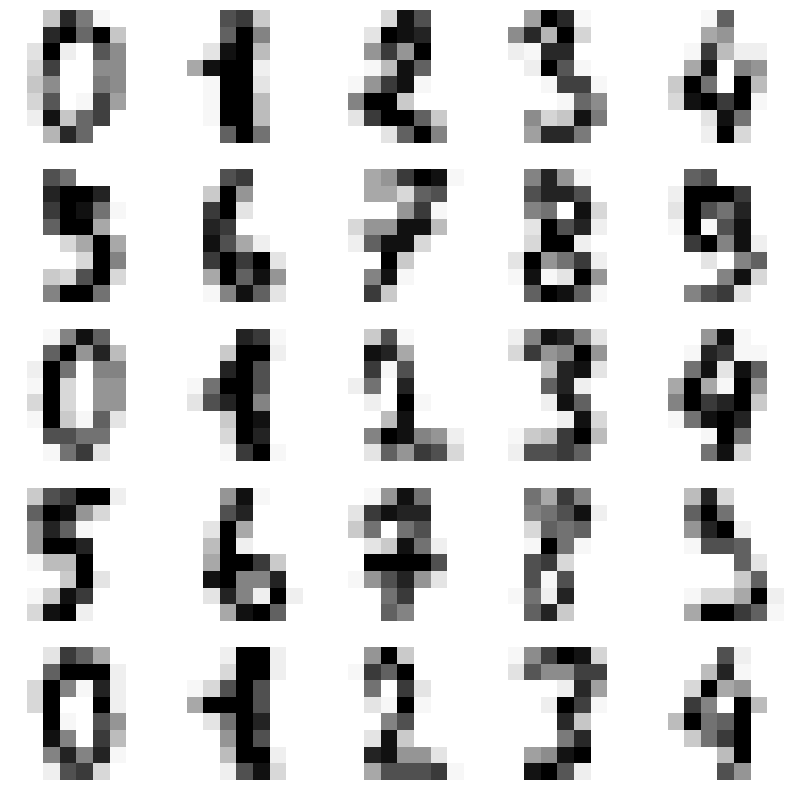

In [4]:
# plot a few of the images

plt.figure(figsize= (10, 10))    
for ii in np.arange(25):
    plt.subplot(5, 5, ii+1)
    plt.imshow(np.reshape(digits.images[ii,:],(8,8)), cmap='Greys',interpolation='nearest')
    plt.axis('off')
plt.show()


You might find [this webpage](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py) to be generally helpful for this exercise. 

### Task 1.1: Classification with Support Vector Machines (SVM)

1. Split the data into a training and test set using the command 
```
train_test_split(X, y, random_state=1, test_size=0.8)
```
    1. Use SVM with an `rbf` kernel and parameter `C=100` to build a classifier using the *training dataset*.
    2. Using the *test dataset*, evaluate the accuracy of the model. Again using the *test dataset*, compute the confusion matrix. What is the most common mistake that the classifier makes? **Note: this corresponds to the largest off-diagonal entry of the confusion matrix.**
    3. Print all of these misclassified digits as images. 
    4. Using the 'cross_val_score' function, evaluate the accuracy of the SVM for 100 different values of the parameter C between 1 and 400. What is the best value? 
    5. Try to train and test the algorithm on the raw (non-scaled) data. Report the accuracy score and confusion matrix for different settings of `gamma`. You may use whatever C value you determined worked well on the scaled data in "part 4". What is your observation of the results on the raw data?

In [5]:
# your solution goes here

**Your Interpretation**: TODO

### Task 1.2: Prediction with k-nearest neighbors
`Repeat` task 1.1 using k-nearest neighbors (k-NN). In part 2, use k=10. In part 5, find the best value of k. 

Work on every single question except the last one (You don't need to handle the non-scaled data here) in task 1.1 

In [6]:
# your solution goes here

**Your Interpretation**: TODO

# Part 2: Satisfaction of Airline Passengers

For this problem, you will use classification tools to predict the satisfaction of airline passengers based on attributes such as the seat comfort, inflight wifi service, ease of online booking, leg-room service, check-in service, and some variables related to the content of the dataset. You can learn details about the dataset in the [info.txt](./Satisfaction/info.txt). 

The dataset contains variables describing 103904 airline passengers.
There are 25 variables associated with each passenger. Of these, 23 are *predictor* variables and 1 variable (id) will not be used. The 'satisfaction' column is what we will use to define the satisfaction level of the passengers, which is what we will try to predict. You should read about the predictor variables in the file *info.txt*.

### Task 2.1 Import and preprocessing the data 
* Use the pandas.read_csv() function to import the dataset. Then, **print** shape of the data and first few lines of data.
* Convert the ordinal data columns (e.g. 'Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction') to numerical data. 
* Drop all rows with NaN values in any column.


In [7]:
# your solution goes here

### Task 2.2 Predictor and Predicted variable
* To use [scikit-learn](http://scikit-learn.org), we'll need to save the data as a numpy array. Use the *DataFrame.values* command to export the predictor variables as a numpy array called *X* this array should not include our target variable (satisfacton). We don't need the id, so let's drop the column. 
* Export the 'satisfaction' column as a separate numpy array, called *satisfaction*. Create a binary numpy array, *y*, which indicates whether the airline passenger was satisfied or not.
* Print *y* array
  


In [8]:
# your solution goes here

### Task 2.3 Classification using k-NN

Develop a k-NN classification model for the data. Use cross validation to choose the best value of k. What is the best accuracy you can obtain on the test data? 
Plot graph of accuracy with various values of k to show your result.

In [9]:
# your solution goes here

**Interpretation:** TODO

### Task 2.4 Classification using SVM

Develop a support vector machine classification model for the data. Show the results of cross-validation along with best parameter at the end.


*Hint:* SVM is more computationally expensive, so you might want to start by using only a fraction of the data, say 4,000 articles. It takes multiple minutes to run on the whole dataset.

In [10]:
# your solution goes here

### Task 2.5 Classification using decision trees

Develop a decision tree classification model for the data. Use cross validation to choose good values of the max tree depth (*max_depth*) and minimum samples split (*min_samples_split*). 
Show the results of cross-validation along with best parameter at the end.
We don't need a plot here, we only need cross validation output and the optimal setting of parameters.

In [11]:
# your solution goes here

### Task 2.6 Describe your findings
1. Which method (k-NN, SVM, Decision Tree) worked best?
    1. How did different parameters influence the accuracy?
    2. Which model is easiest to interpret?
    3. How would you interpret your results?


**Your Solution:** TODO